In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

In [ ]:
#analyze save percentage
#goal against average
#goalie save percentage to league average
#team metrics
    #wins/losses
    #goals for/against
    #how well does the defense perform?
#correlation analysis
    #relationship between saves and team record (team performance correlated to a goalies performance)
    #comparison over time 
#trend graph (save percentage, win rate over time)

In [2]:
teams = pd.read_csv(r"C:\DA12\capstone\da12_NHL_capstone\extradata\all_teams.csv")
teams

,team,season,name,gameId,playerTeam,opposingTeam,home_or_away,gameDate,position,situation,...,unblockedShotAttemptsAgainst,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst,playoffGame
0,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,other,...,1.0,1.000,0.0,0.017,0.000,0.000,0.037,0.037,0.037,0
1,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,all,...,31.0,30.369,5.0,0.396,0.168,0.168,2.917,2.833,2.714,0
2,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,5on5,...,20.0,19.369,3.0,0.237,0.168,0.168,1.862,1.777,1.665,0
3,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,4on5,...,9.0,9.000,1.0,0.124,0.000,0.000,0.795,0.795,0.789,0
4,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,5on4,...,1.0,1.000,1.0,0.019,0.000,0.000,0.224,0.224,0.224,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204295,L.A,2017,L.A,2017030174,L.A,VGK,HOME,20180417,Team Level,other,...,0.0,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,1
204296,L.A,2017,L.A,2017030174,L.A,VGK,HOME,20180417,Team Level,all,...,34.0,36.654,8.0,0.320,0.285,0.285,1.853,2.012,1.976,1
204297,L.A,2017,L.A,2017030174,L.A,VGK,HOME,20180417,Team Level,5on5,...,32.0,34.654,7.0,0.299,0.285,0.285,1.814,1.972,1.937,1
204298,L.A,2017,L.A,2017030174,L.A,VGK,HOME,20180417,Team Level,4on5,...,2.0,2.000,0.0,0.021,0.000,0.000,0.040,0.040,0.040,1


In [3]:
nhl_teams_cleaned = teams[['team','season','name','gameId','opposingTeam','home_or_away','gameDate','situation','shotsOnGoalFor','savedShotsOnGoalFor','goalsFor','shotsOnGoalAgainst','savedShotsOnGoalAgainst','goalsAgainst','playoffGame']]
nhl_teams_cleaned
#created a df with only neccessary data

,team,season,name,gameId,opposingTeam,home_or_away,gameDate,situation,shotsOnGoalFor,savedShotsOnGoalFor,goalsFor,shotsOnGoalAgainst,savedShotsOnGoalAgainst,goalsAgainst,playoffGame
0,NYR,2008,NYR,2008020001,T.B,AWAY,20081004,other,0.0,0.0,0.0,1.0,1.0,0.0,0
1,NYR,2008,NYR,2008020001,T.B,AWAY,20081004,all,41.0,39.0,2.0,21.0,20.0,1.0,0
2,NYR,2008,NYR,2008020001,T.B,AWAY,20081004,5on5,28.0,27.0,1.0,11.0,10.0,1.0,0
3,NYR,2008,NYR,2008020001,T.B,AWAY,20081004,4on5,1.0,1.0,0.0,8.0,8.0,0.0,0
4,NYR,2008,NYR,2008020001,T.B,AWAY,20081004,5on4,12.0,11.0,1.0,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204295,L.A,2017,L.A,2017030174,VGK,HOME,20180417,other,1.0,1.0,0.0,0.0,0.0,0.0,1
204296,L.A,2017,L.A,2017030174,VGK,HOME,20180417,all,31.0,31.0,0.0,21.0,20.0,1.0,1
204297,L.A,2017,L.A,2017030174,VGK,HOME,20180417,5on5,29.0,29.0,0.0,19.0,18.0,1.0,1
204298,L.A,2017,L.A,2017030174,VGK,HOME,20180417,4on5,0.0,0.0,0.0,2.0,2.0,0.0,1


In [12]:
shot_attempts_analysis = teams.groupby(['team', 'opposingTeam']).agg(
    total_shot_attempts_against=('totalShotCreditAgainst', 'sum'),
    unblocked_shot_attempts_against=('unblockedShotAttemptsAgainst', 'sum')
).reset_index()
shot_attempts_analysis
#obtain total shots against teams and unblocked shot attempts against (shows how the defence performed)

,team,opposingTeam,total_shot_attempts_against,unblocked_shot_attempts_against
0,ANA,ARI,412.816,6700.0
1,ANA,ATL,19.241,284.0
2,ANA,BOS,124.966,2216.0
3,ANA,BUF,136.837,2156.0
4,ANA,CAR,164.617,2516.0
...,...,...,...,...
1274,WSH,TBL,54.116,770.0
1275,WSH,TOR,326.102,4784.0
1276,WSH,VAN,131.592,2046.0
1277,WSH,VGK,93.502,1474.0


In [13]:
limited_shot_attempts_analysis = shot_attempts_analysis.head(20)
limited_shot_attempts_analysis
#narrow down dataframe to be able to graph just top 20 rows

,team,opposingTeam,total_shot_attempts_against,unblocked_shot_attempts_against
0,ANA,ARI,412.816,6700.0
1,ANA,ATL,19.241,284.0
2,ANA,BOS,124.966,2216.0
3,ANA,BUF,136.837,2156.0
4,ANA,CAR,164.617,2516.0
5,ANA,CBJ,210.897,3228.0
6,ANA,CGY,371.809,6022.0
7,ANA,CHI,325.876,5018.0
8,ANA,COL,321.183,5028.0
9,ANA,DAL,371.119,5708.0


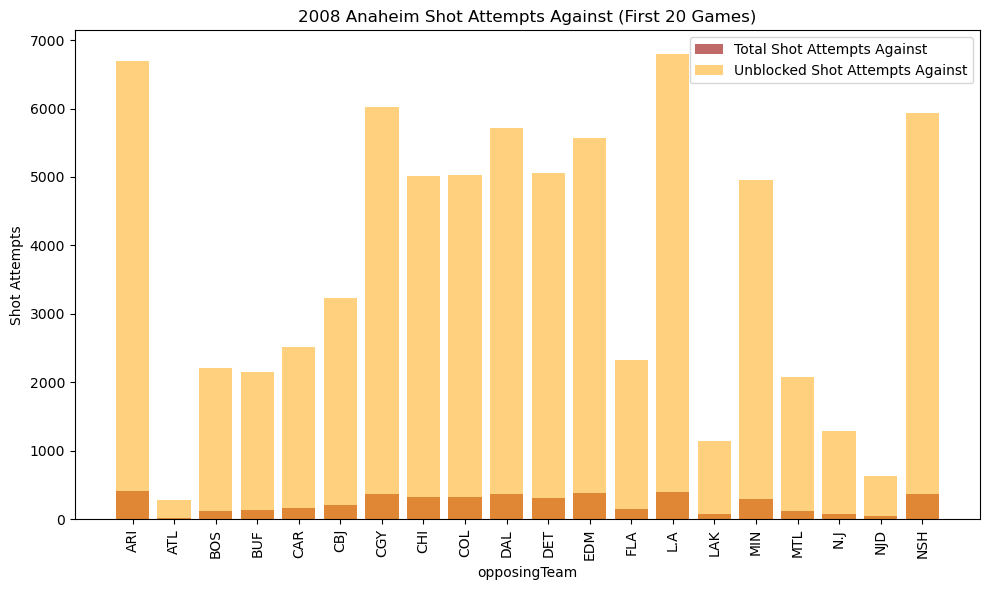

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(limited_shot_attempts_analysis['opposingTeam'], limited_shot_attempts_analysis['total_shot_attempts_against'],
        color='brown', label='Total Shot Attempts Against', alpha=0.7)
plt.bar(limited_shot_attempts_analysis['opposingTeam'], limited_shot_attempts_analysis['unblocked_shot_attempts_against'],
        color='orange', label='Unblocked Shot Attempts Against', alpha=0.5)
plt.xlabel('opposingTeam')
plt.ylabel('Shot Attempts')
plt.title('2008 Anaheim Shot Attempts Against (First 20 Games)')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
goalie_performance_against_opponents = teams.groupby('opposingTeam').agg(
    total_shot_attempts_against=('totalShotCreditAgainst', 'sum'),
    unblocked_shot_attempts_against=('unblockedShotAttemptsAgainst', 'sum'),
    x_goals_from_rebounds_against=('xGoalsFromxReboundsOfShotsAgainst', 'sum'),
    rebound_goals_against=('reboundxGoalsAgainst', 'sum')
).reset_index()
goalie_performance_against_opponents

,opposingTeam,total_shot_attempts_against,unblocked_shot_attempts_against,x_goals_from_rebounds_against,rebound_goals_against
0,ANA,6856.846,108930.0,1162.576,1198.160
1,ARI,7100.892,113708.0,1225.394,1338.474
2,ATL,1253.097,19876.0,211.712,236.135
3,BOS,8262.577,126060.0,1331.409,1325.907
4,BUF,6516.449,101742.0,1102.462,1118.372
5,CAR,7924.158,121830.0,1304.819,1636.334
6,CBJ,6629.268,105072.0,1130.595,1213.723
7,CGY,7130.158,110612.0,1192.141,1327.292
8,CHI,7444.985,114740.0,1245.113,1275.950
9,COL,7187.511,110978.0,1223.435,1485.449


In [21]:
limited_goalie_performance = goalie_performance_against_opponents.head(10)
limited_goalie_performance

,opposingTeam,total_shot_attempts_against,unblocked_shot_attempts_against,x_goals_from_rebounds_against,rebound_goals_against
0,ANA,6856.846,108930.0,1162.576,1198.160
1,ARI,7100.892,113708.0,1225.394,1338.474
2,ATL,1253.097,19876.0,211.712,236.135
3,BOS,8262.577,126060.0,1331.409,1325.907
4,BUF,6516.449,101742.0,1102.462,1118.372
5,CAR,7924.158,121830.0,1304.819,1636.334
6,CBJ,6629.268,105072.0,1130.595,1213.723
7,CGY,7130.158,110612.0,1192.141,1327.292
8,CHI,7444.985,114740.0,1245.113,1275.950
9,COL,7187.511,110978.0,1223.435,1485.449


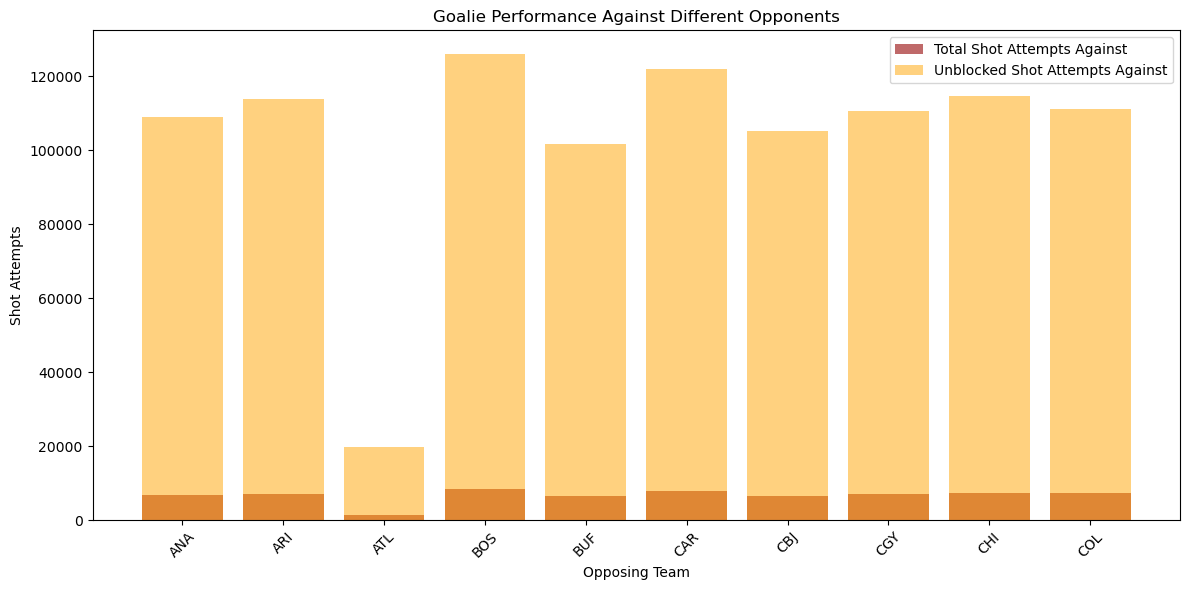

In [23]:
plt.figure(figsize=(12, 6))
plt.bar(limited_goalie_performance['opposingTeam'],
        limited_goalie_performance['total_shot_attempts_against'],
        color='brown', label='Total Shot Attempts Against', alpha=0.7)
plt.bar(limited_goalie_performance['opposingTeam'],
        limited_goalie_performance['unblocked_shot_attempts_against'],
        color='orange', label='Unblocked Shot Attempts Against', alpha=0.5)
plt.xlabel('Opposing Team')
plt.ylabel('Shot Attempts')
plt.title('Goalie Performance Against Different Opponents')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
goalie_performance_by_situation = teams.groupby('situation').agg(
    total_shot_attempts_against=('totalShotCreditAgainst', 'sum'),
    unblocked_shot_attempts_against=('unblockedShotAttemptsAgainst', 'sum'),
    x_goals_from_rebounds_against=('xGoalsFromxReboundsOfShotsAgainst', 'sum'),
    rebound_goals_against=('reboundxGoalsAgainst', 'sum')
).reset_index()
goalie_performance_by_situation

,situation,total_shot_attempts_against,unblocked_shot_attempts_against,x_goals_from_rebounds_against,rebound_goals_against
0,4on5,21263.494,248950.0,4089.654,4300.507
1,5on4,2910.403,41457.0,334.147,296.833
2,5on5,75442.351,1342210.0,12940.002,14577.963
3,all,113395.690,1734682.0,18849.383,20927.935
4,other,13779.470,102065.0,1485.476,1752.669


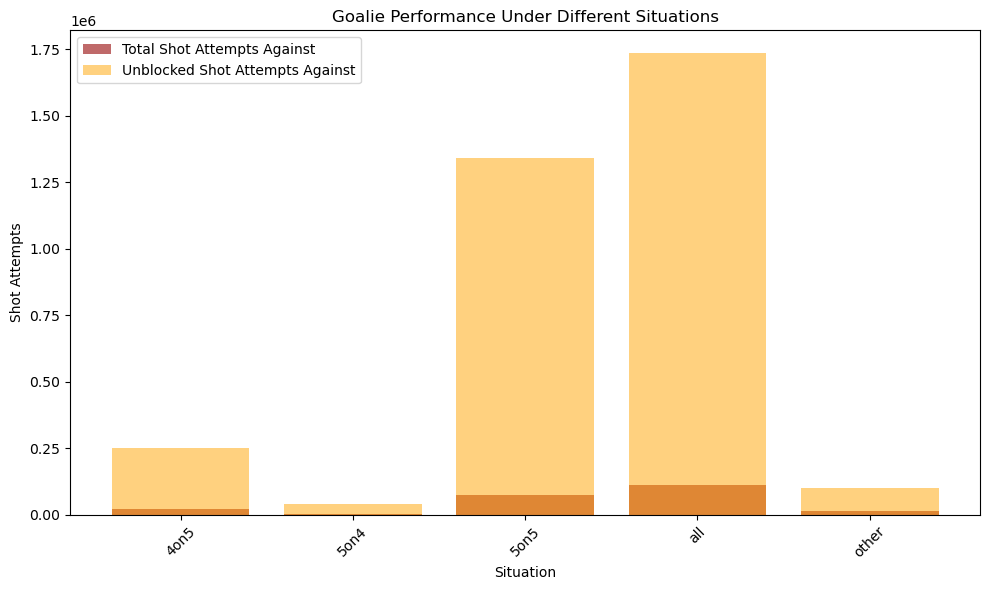

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(goalie_performance_by_situation['situation'],
        goalie_performance_by_situation['total_shot_attempts_against'],
        color='brown', label='Total Shot Attempts Against', alpha=0.7)
plt.bar(goalie_performance_by_situation['situation'],
        goalie_performance_by_situation['unblocked_shot_attempts_against'],
        color='orange', label='Unblocked Shot Attempts Against', alpha=0.5)
plt.xlabel('Situation')
plt.ylabel('Shot Attempts')
plt.title('Goalie Performance Under Different Situations')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
teams['GSAx'] = teams['reboundxGoalsAgainst'] - teams['xGoalsFromxReboundsOfShotsAgainst']
teams

,team,season,name,gameId,playerTeam,opposingTeam,home_or_away,gameDate,position,situation,...,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst,playoffGame,GSAx
0,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,other,...,1.000,0.0,0.017,0.000,0.000,0.037,0.037,0.037,0,-0.017
1,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,all,...,30.369,5.0,0.396,0.168,0.168,2.917,2.833,2.714,0,-0.228
2,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,5on5,...,19.369,3.0,0.237,0.168,0.168,1.862,1.777,1.665,0,-0.069
3,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,4on5,...,9.000,1.0,0.124,0.000,0.000,0.795,0.795,0.789,0,-0.124
4,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,5on4,...,1.000,1.0,0.019,0.000,0.000,0.224,0.224,0.224,0,-0.019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204295,L.A,2017,L.A,2017030174,L.A,VGK,HOME,20180417,Team Level,other,...,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,1,0.000
204296,L.A,2017,L.A,2017030174,L.A,VGK,HOME,20180417,Team Level,all,...,36.654,8.0,0.320,0.285,0.285,1.853,2.012,1.976,1,-0.035
204297,L.A,2017,L.A,2017030174,L.A,VGK,HOME,20180417,Team Level,5on5,...,34.654,7.0,0.299,0.285,0.285,1.814,1.972,1.937,1,-0.014
204298,L.A,2017,L.A,2017030174,L.A,VGK,HOME,20180417,Team Level,4on5,...,2.000,0.0,0.021,0.000,0.000,0.040,0.040,0.040,1,-0.021


In [31]:
gsax_by_game = teams.groupby('team').agg(
    total_GSAx=('GSAx', 'sum')
).reset_index()
gsax_by_game

,team,total_GSAx
0,ANA,105.449
1,ARI,132.308
2,ATL,23.164
3,BOS,35.765
4,BUF,61.022
5,CAR,231.439
6,CBJ,126.612
7,CGY,130.438
8,CHI,207.094
9,COL,260.503


In [32]:
gsax_by_season = teams.groupby(['team','season']).agg(
    total_GSAx=('GSAx', 'sum')
).reset_index()
gsax_by_season

,team,season,total_GSAx
0,ANA,2008,-1.535
1,ANA,2009,12.746
2,ANA,2010,8.258
3,ANA,2011,11.621
4,ANA,2012,-0.407
...,...,...,...
485,WSH,2019,7.794
486,WSH,2020,1.319
487,WSH,2021,13.402
488,WSH,2022,17.368


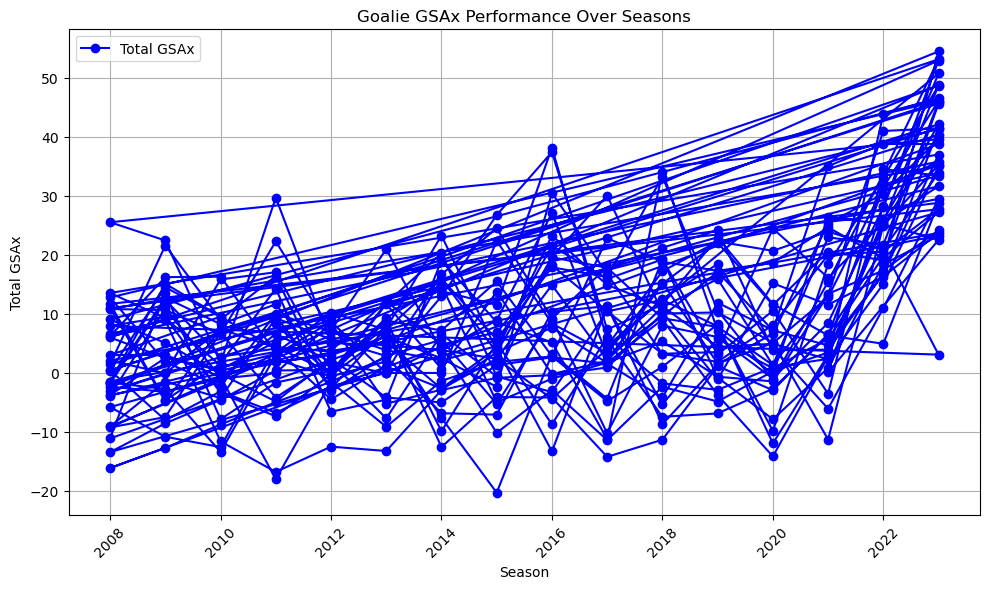

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(gsax_by_season['season'], gsax_by_season['total_GSAx'], marker='o', color='blue', label='Total GSAx')
plt.xlabel('Season')
plt.ylabel('Total GSAx')
plt.title('Goalie GSAx Performance Over Seasons')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [35]:
giveaway_analysis = teams.groupby('team').agg(
    total_giveaways=('dZoneGiveawaysAgainst', 'sum'),
    total_shot_attempts_against=('totalShotCreditAgainst', 'sum'),
    unblocked_shot_attempts_against=('unblockedShotAttemptsAgainst', 'sum'),
    x_goals_from_rebounds_against=('xGoalsFromxReboundsOfShotsAgainst', 'sum'),
    rebound_goals_against=('reboundxGoalsAgainst', 'sum')
).reset_index()
giveaway_analysis

,team,total_giveaways,total_shot_attempts_against,unblocked_shot_attempts_against,x_goals_from_rebounds_against,rebound_goals_against
0,ANA,13314.0,7490.579,118242.0,1290.855,1396.304
1,ARI,9748.0,7515.827,116220.0,1274.685,1406.993
2,ATL,1880.0,1466.485,21530.0,236.470,259.634
3,BOS,13574.0,7525.087,117082.0,1250.090,1285.855
4,BUF,10520.0,7360.905,111926.0,1205.432,1266.454
5,CAR,12922.0,7230.904,109532.0,1185.335,1416.774
6,CBJ,9048.0,7108.861,110406.0,1185.647,1312.259
7,CGY,14684.0,6914.380,106432.0,1144.968,1275.406
8,CHI,14122.0,7466.532,114122.0,1259.271,1466.365
9,COL,9628.0,7392.939,115028.0,1266.980,1527.483


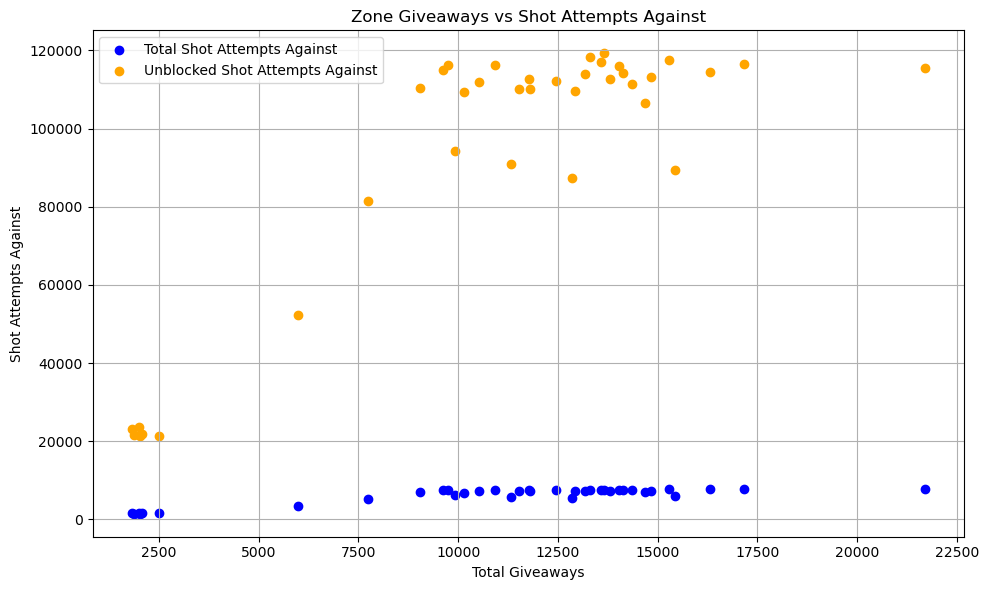

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(giveaway_analysis['total_giveaways'], giveaway_analysis['total_shot_attempts_against'], color='blue', label='Total Shot Attempts Against')
plt.scatter(giveaway_analysis['total_giveaways'], giveaway_analysis['unblocked_shot_attempts_against'], color='orange', label='Unblocked Shot Attempts Against')
plt.xlabel('Total Giveaways')
plt.ylabel('Shot Attempts Against')
plt.title('Zone Giveaways vs Shot Attempts Against')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [39]:
team_data = teams.groupby('team').agg(
    total_shot_attempts_against=('totalShotCreditAgainst', 'sum'),
    total_unblocked_shots_against=('unblockedShotAttemptsAgainst', 'sum'),
    total_GSAx=('GSAx', 'sum'),
    total_x_goals_from_rebounds_against=('xGoalsFromxReboundsOfShotsAgainst', 'sum'),
    total_rebound_goals_against=('reboundxGoalsAgainst', 'sum')
).reset_index()
team_data

,team,total_shot_attempts_against,total_unblocked_shots_against,total_GSAx,total_x_goals_from_rebounds_against,total_rebound_goals_against
0,ANA,7490.579,118242.0,105.449,1290.855,1396.304
1,ARI,7515.827,116220.0,132.308,1274.685,1406.993
2,ATL,1466.485,21530.0,23.164,236.470,259.634
3,BOS,7525.087,117082.0,35.765,1250.090,1285.855
4,BUF,7360.905,111926.0,61.022,1205.432,1266.454
5,CAR,7230.904,109532.0,231.439,1185.335,1416.774
6,CBJ,7108.861,110406.0,126.612,1185.647,1312.259
7,CGY,6914.380,106432.0,130.438,1144.968,1275.406
8,CHI,7466.532,114122.0,207.094,1259.271,1466.365
9,COL,7392.939,115028.0,260.503,1266.980,1527.483


In [40]:
top_10_teams = team_data.sort_values(by='total_GSAx', ascending=False).head(10)
top_10_teams

,team,total_shot_attempts_against,total_unblocked_shots_against,total_GSAx,total_x_goals_from_rebounds_against,total_rebound_goals_against
13,FLA,7439.887,112790.0,267.792,1228.672,1496.464
9,COL,7392.939,115028.0,260.503,1266.980,1527.483
5,CAR,7230.904,109532.0,231.439,1185.335,1416.774
24,PHI,7421.408,111338.0,223.588,1205.685,1429.273
8,CHI,7466.532,114122.0,207.094,1259.271,1466.365
22,NYR,7600.070,119260.0,184.133,1272.685,1456.818
35,WPG,5992.857,89474.0,178.608,983.215,1161.823
25,PIT,7469.843,116272.0,163.895,1264.884,1428.779
12,EDM,7662.974,114588.0,162.253,1242.906,1405.159
21,NYI,7489.052,116088.0,148.959,1250.143,1399.102


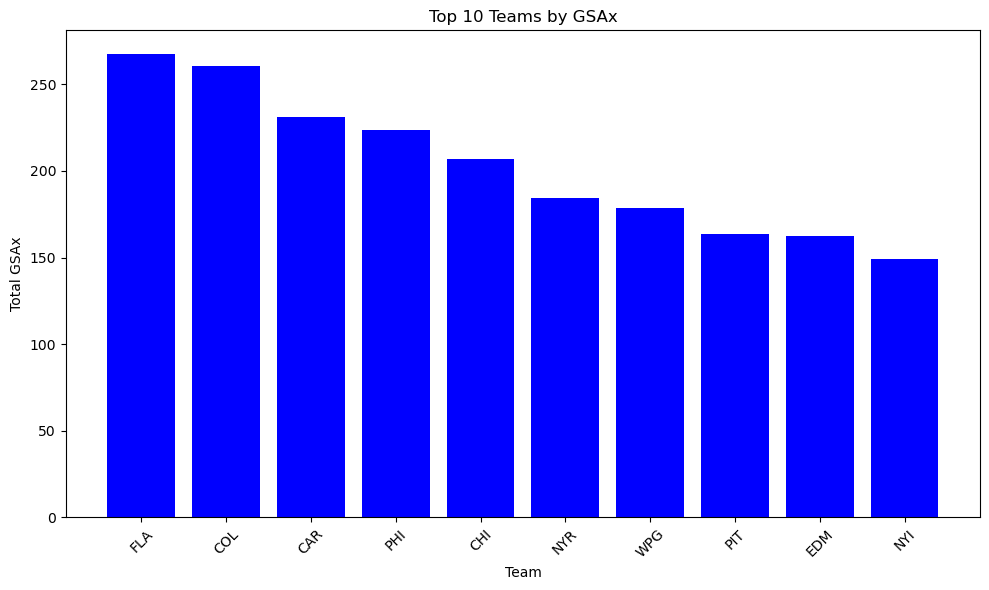

In [41]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_teams['team'], top_10_teams['total_GSAx'], color='blue')
plt.xlabel('Team')
plt.ylabel('Total GSAx')
plt.title('Top 10 Teams by GSAx')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

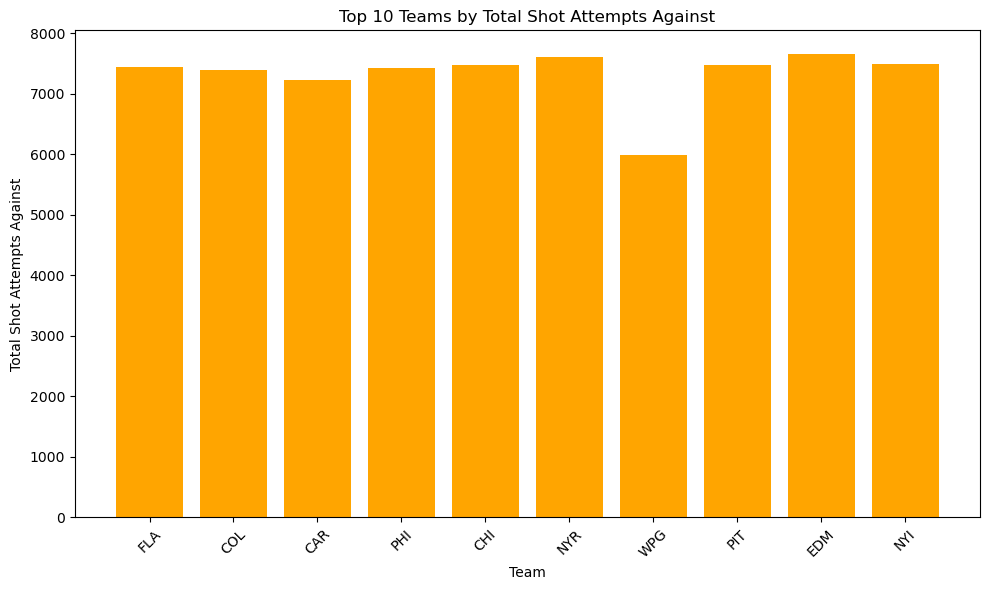

In [44]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_teams['team'], top_10_teams['total_shot_attempts_against'], color='orange')
plt.xlabel('Team')
plt.ylabel('Total Shot Attempts Against')
plt.title('Top 10 Teams by Total Shot Attempts Against')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

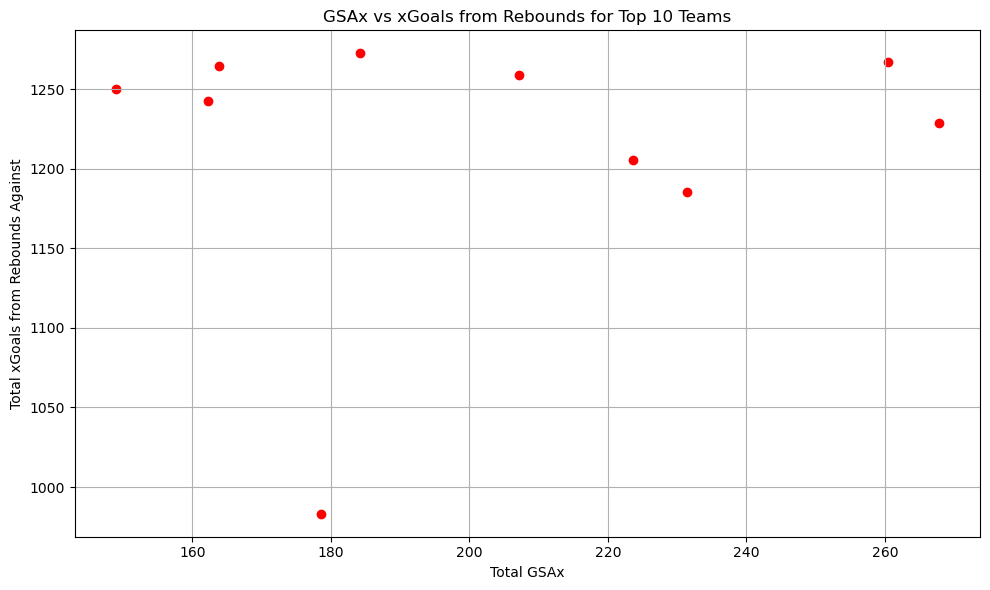

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(top_10_teams['total_GSAx'], top_10_teams['total_x_goals_from_rebounds_against'], color='red')
plt.xlabel('Total GSAx')
plt.ylabel('Total xGoals from Rebounds Against')
plt.title('GSAx vs xGoals from Rebounds for Top 10 Teams')
plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
team_data = teams.groupby('team').agg(
    total_shot_attempts_against=('totalShotCreditAgainst', 'sum'),
    total_unblocked_shots_against=('unblockedShotAttemptsAgainst', 'sum'),
    total_GSAx=('GSAx', 'sum'),
    total_x_goals_from_rebounds_against=('xGoalsFromxReboundsOfShotsAgainst', 'sum'),
    total_rebound_goals_against=('reboundxGoalsAgainst', 'sum')
).reset_index()
team_data

,team,total_shot_attempts_against,total_unblocked_shots_against,total_GSAx,total_x_goals_from_rebounds_against,total_rebound_goals_against
0,ANA,7490.579,118242.0,105.449,1290.855,1396.304
1,ARI,7515.827,116220.0,132.308,1274.685,1406.993
2,ATL,1466.485,21530.0,23.164,236.470,259.634
3,BOS,7525.087,117082.0,35.765,1250.090,1285.855
4,BUF,7360.905,111926.0,61.022,1205.432,1266.454
5,CAR,7230.904,109532.0,231.439,1185.335,1416.774
6,CBJ,7108.861,110406.0,126.612,1185.647,1312.259
7,CGY,6914.380,106432.0,130.438,1144.968,1275.406
8,CHI,7466.532,114122.0,207.094,1259.271,1466.365
9,COL,7392.939,115028.0,260.503,1266.980,1527.483


In [47]:
top_10_teams_by_shots = team_data.sort_values(by='total_shot_attempts_against', ascending=False).head(10)
top_10_teams_by_shots

,team,total_shot_attempts_against,total_unblocked_shots_against,total_GSAx,total_x_goals_from_rebounds_against,total_rebound_goals_against
32,TOR,7803.471,116518.0,90.950,1253.115,1344.065
36,WSH,7729.666,117652.0,107.982,1297.249,1405.231
17,MTL,7691.046,115390.0,96.866,1274.768,1371.634
12,EDM,7662.974,114588.0,162.253,1242.906,1405.159
22,NYR,7600.070,119260.0,184.133,1272.685,1456.818
3,BOS,7525.087,117082.0,35.765,1250.090,1285.855
1,ARI,7515.827,116220.0,132.308,1274.685,1406.993
0,ANA,7490.579,118242.0,105.449,1290.855,1396.304
21,NYI,7489.052,116088.0,148.959,1250.143,1399.102
25,PIT,7469.843,116272.0,163.895,1264.884,1428.779


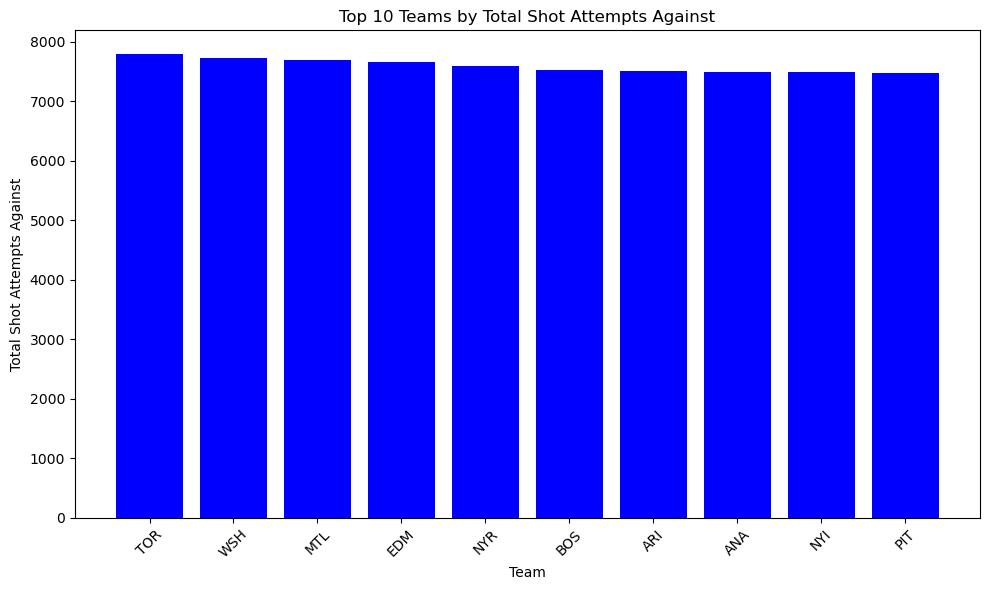

In [48]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_teams_by_shots['team'], top_10_teams_by_shots['total_shot_attempts_against'], color='blue')
plt.xlabel('Team')
plt.ylabel('Total Shot Attempts Against')
plt.title('Top 10 Teams by Total Shot Attempts Against')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

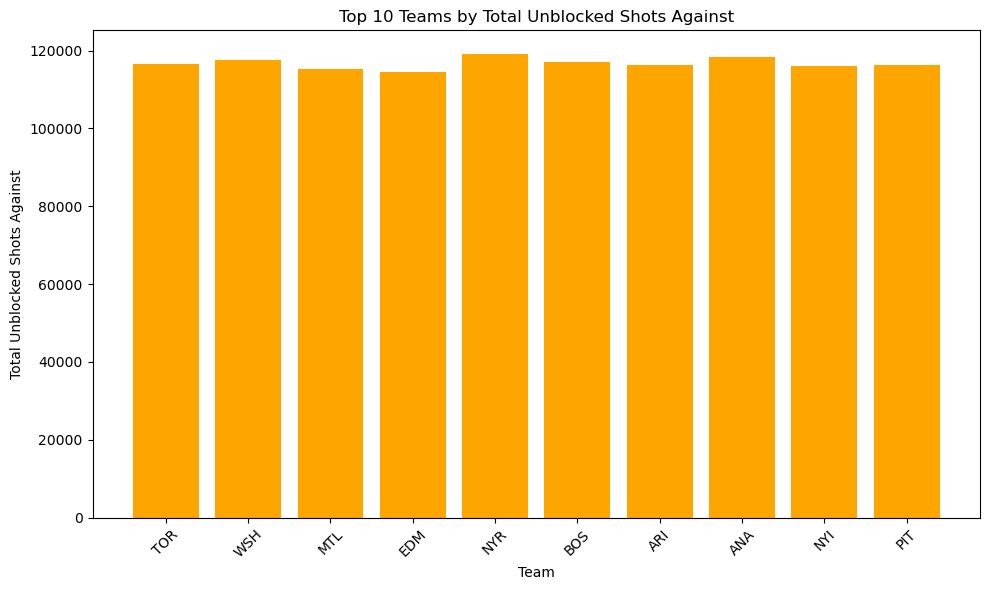

In [49]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_teams_by_shots['team'], top_10_teams_by_shots['total_unblocked_shots_against'], color='orange')
plt.xlabel('Team')
plt.ylabel('Total Unblocked Shots Against')
plt.title('Top 10 Teams by Total Unblocked Shots Against')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

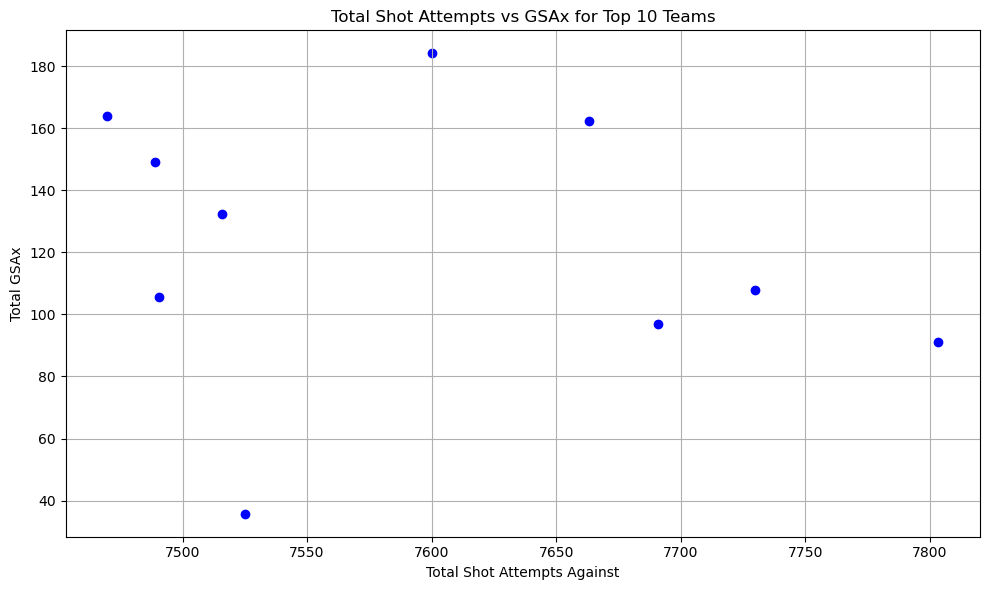

In [50]:
plt.figure(figsize=(10, 6))
plt.scatter(top_10_teams_by_shots['total_shot_attempts_against'], top_10_teams_by_shots['total_GSAx'], color='blue')
plt.xlabel('Total Shot Attempts Against')
plt.ylabel('Total GSAx')
plt.title('Total Shot Attempts vs GSAx for Top 10 Teams')
plt.grid(True)
plt.tight_layout()
plt.show()

In [51]:
team_data_by_season = teams.groupby(['team', 'season']).agg(
    total_shot_attempts_against=('totalShotCreditAgainst', 'sum'),
    total_unblocked_shots_against=('unblockedShotAttemptsAgainst', 'sum'),
    total_GSAx=('GSAx', 'sum')
).reset_index()
team_data_by_season

,team,season,total_shot_attempts_against,total_unblocked_shots_against,total_GSAx
0,ANA,2008,529.703,8424.0,-1.535
1,ANA,2009,486.921,7656.0,12.746
2,ANA,2010,507.884,8118.0,8.258
3,ANA,2011,412.053,6828.0,11.621
4,ANA,2012,274.205,4598.0,-0.407
...,...,...,...,...,...
485,WSH,2019,424.427,6296.0,7.794
486,WSH,2020,326.705,5082.0,1.319
487,WSH,2021,474.530,7272.0,13.402
488,WSH,2022,518.298,7224.0,17.368


In [52]:
top_10_teams_by_shots = team_data_by_season.groupby('team').agg(
    total_shot_attempts_against=('total_shot_attempts_against', 'sum')
).reset_index().sort_values(by='total_shot_attempts_against', ascending=False).head(10)
top_10_teams_by_shots

,team,total_shot_attempts_against
32,TOR,7803.471
36,WSH,7729.666
17,MTL,7691.046
12,EDM,7662.974
22,NYR,7600.070
3,BOS,7525.087
1,ARI,7515.827
0,ANA,7490.579
21,NYI,7489.052
25,PIT,7469.843


In [53]:
top_10_teams_data = team_data_by_season[team_data_by_season['team'].isin(top_10_teams_by_shots['team'])]
top_10_teams_data

,team,season,total_shot_attempts_against,total_unblocked_shots_against,total_GSAx
0,ANA,2008,529.703,8424.0,-1.535
1,ANA,2009,486.921,7656.0,12.746
2,ANA,2010,507.884,8118.0,8.258
3,ANA,2011,412.053,6828.0,11.621
4,ANA,2012,274.205,4598.0,-0.407
...,...,...,...,...,...
485,WSH,2019,424.427,6296.0,7.794
486,WSH,2020,326.705,5082.0,1.319
487,WSH,2021,474.530,7272.0,13.402
488,WSH,2022,518.298,7224.0,17.368


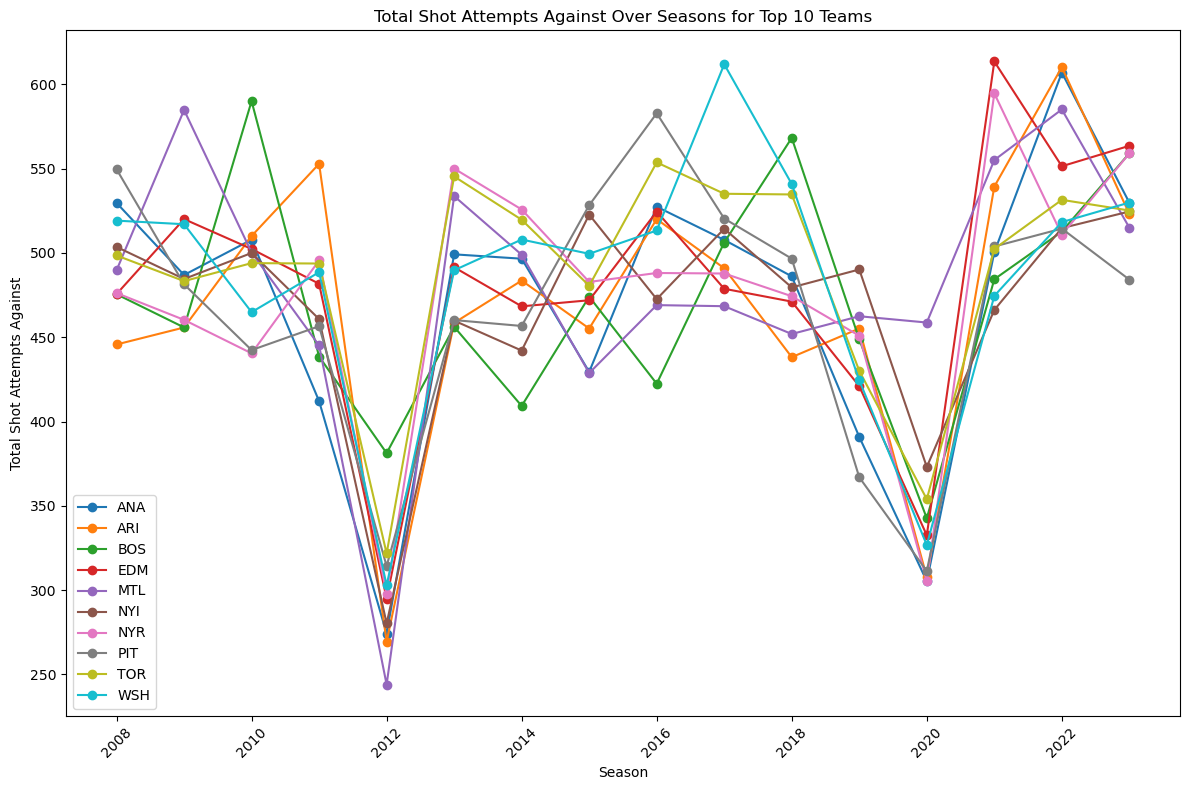

In [54]:
plt.figure(figsize=(12, 8))
for team in top_10_teams_data['team'].unique():
    team_season_data = top_10_teams_data[top_10_teams_data['team'] == team]
    plt.plot(team_season_data['season'], team_season_data['total_shot_attempts_against'], marker='o', label=team)
plt.xlabel('Season')
plt.ylabel('Total Shot Attempts Against')
plt.title('Total Shot Attempts Against Over Seasons for Top 10 Teams')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

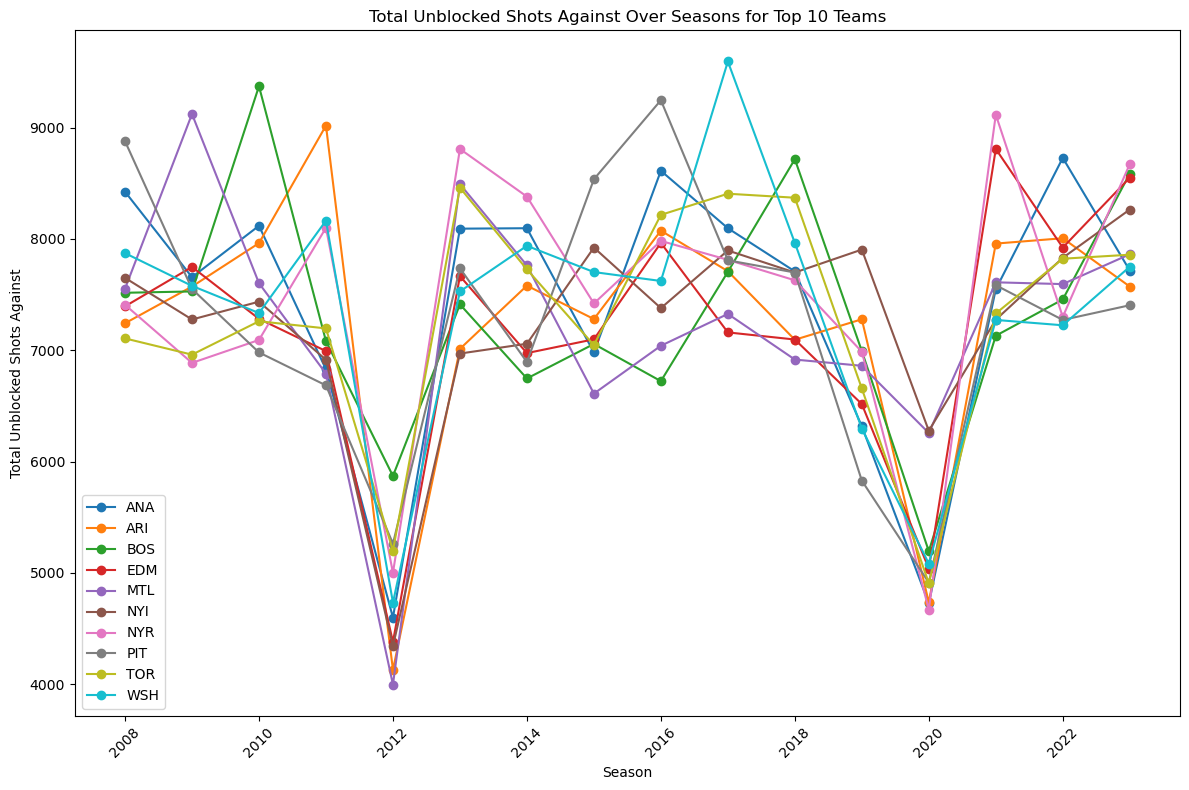

In [55]:
plt.figure(figsize=(12, 8))
for team in top_10_teams_data['team'].unique():
    team_season_data = top_10_teams_data[top_10_teams_data['team'] == team]
    plt.plot(team_season_data['season'], team_season_data['total_unblocked_shots_against'], marker='o', label=team)
plt.xlabel('Season')
plt.ylabel('Total Unblocked Shots Against')
plt.title('Total Unblocked Shots Against Over Seasons for Top 10 Teams')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

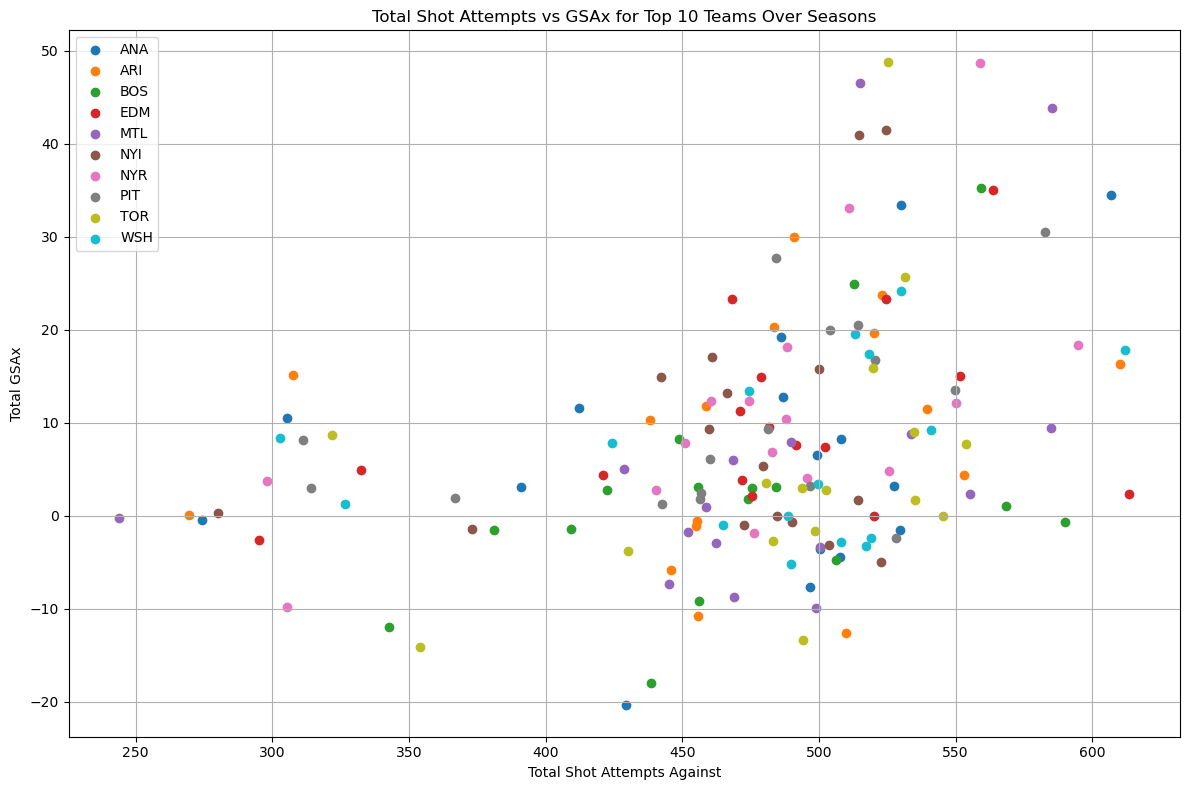

In [56]:
plt.figure(figsize=(12, 8))
for team in top_10_teams_data['team'].unique():
    team_season_data = top_10_teams_data[top_10_teams_data['team'] == team]
    plt.scatter(team_season_data['total_shot_attempts_against'], team_season_data['total_GSAx'], label=team)
plt.xlabel('Total Shot Attempts Against')
plt.ylabel('Total GSAx')
plt.title('Total Shot Attempts vs GSAx for Top 10 Teams Over Seasons')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [58]:
team_data_by_season['save_percentage'] = 1 - (team_data_by_season['total_unblocked_shots_against'] / team_data_by_season['total_shot_attempts_against'])
team_data_by_season

,team,season,total_shot_attempts_against,total_unblocked_shots_against,total_GSAx,save_percentage
0,ANA,2008,529.703,8424.0,-1.535,-14.903251
1,ANA,2009,486.921,7656.0,12.746,-14.723290
2,ANA,2010,507.884,8118.0,8.258,-14.983965
3,ANA,2011,412.053,6828.0,11.621,-15.570684
4,ANA,2012,274.205,4598.0,-0.407,-15.768476
...,...,...,...,...,...,...
485,WSH,2019,424.427,6296.0,7.794,-13.834118
486,WSH,2020,326.705,5082.0,1.319,-14.555317
487,WSH,2021,474.530,7272.0,13.402,-14.324637
488,WSH,2022,518.298,7224.0,17.368,-12.937928


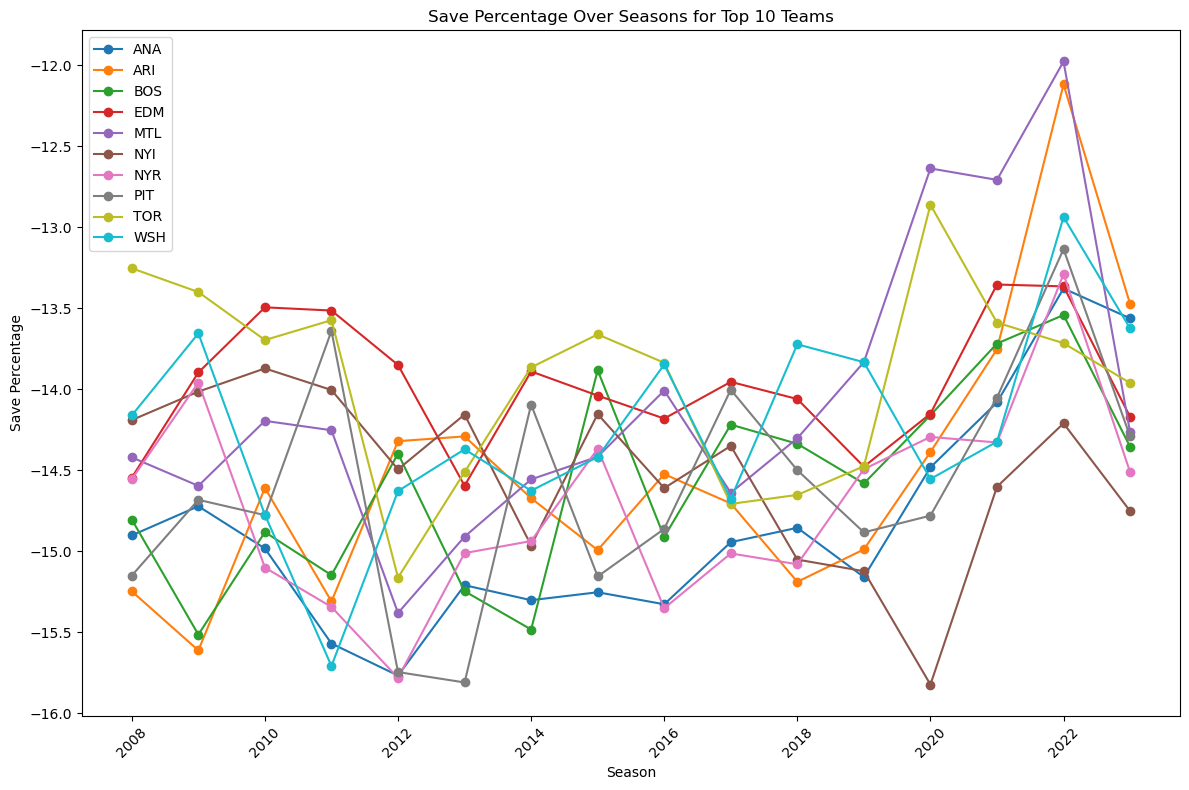

In [59]:
plt.figure(figsize=(12, 8))
for team in top_10_teams_data['team'].unique():
    team_season_data = team_data_by_season[team_data_by_season['team'] == team]
    plt.plot(team_season_data['season'], team_season_data['save_percentage'], marker='o', label=team)
plt.xlabel('Season')
plt.ylabel('Save Percentage')
plt.title('Save Percentage Over Seasons for Top 10 Teams')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

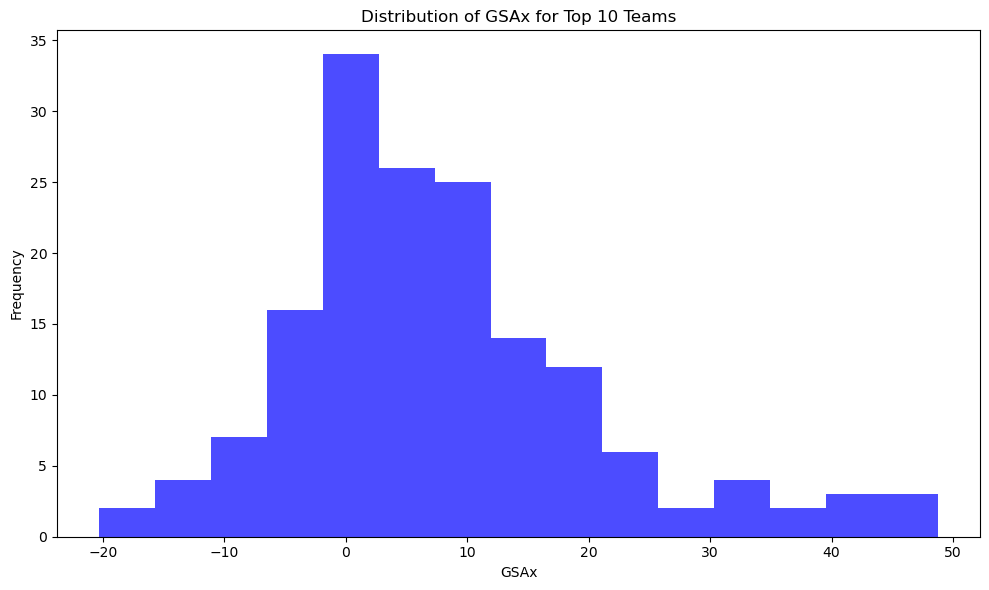

In [61]:
plt.figure(figsize=(10, 6))
plt.hist(top_10_teams_data['total_GSAx'], bins=15, color='blue', alpha=0.7)
plt.xlabel('GSAx')
plt.ylabel('Frequency')
plt.title('Distribution of GSAx for Top 10 Teams')
plt.tight_layout()
plt.show()

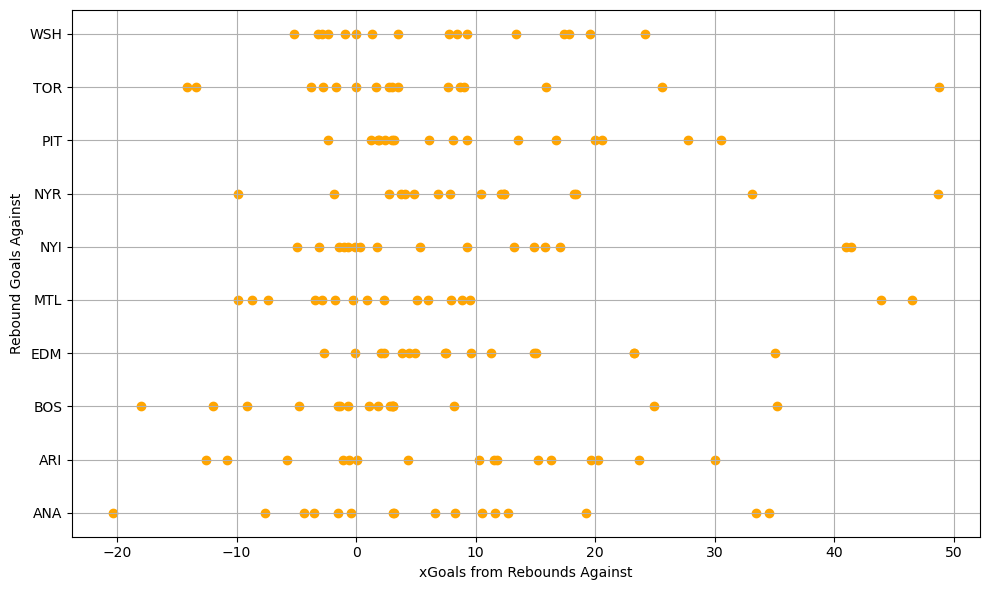

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(top_10_teams_data['total_GSAx'], top_10_teams_data['team'], color='orange')
plt.xlabel('xGoals from Rebounds Against')
plt.ylabel('Rebound Goals Against')
plt.grid(True)
plt.tight_layout()
plt.show()

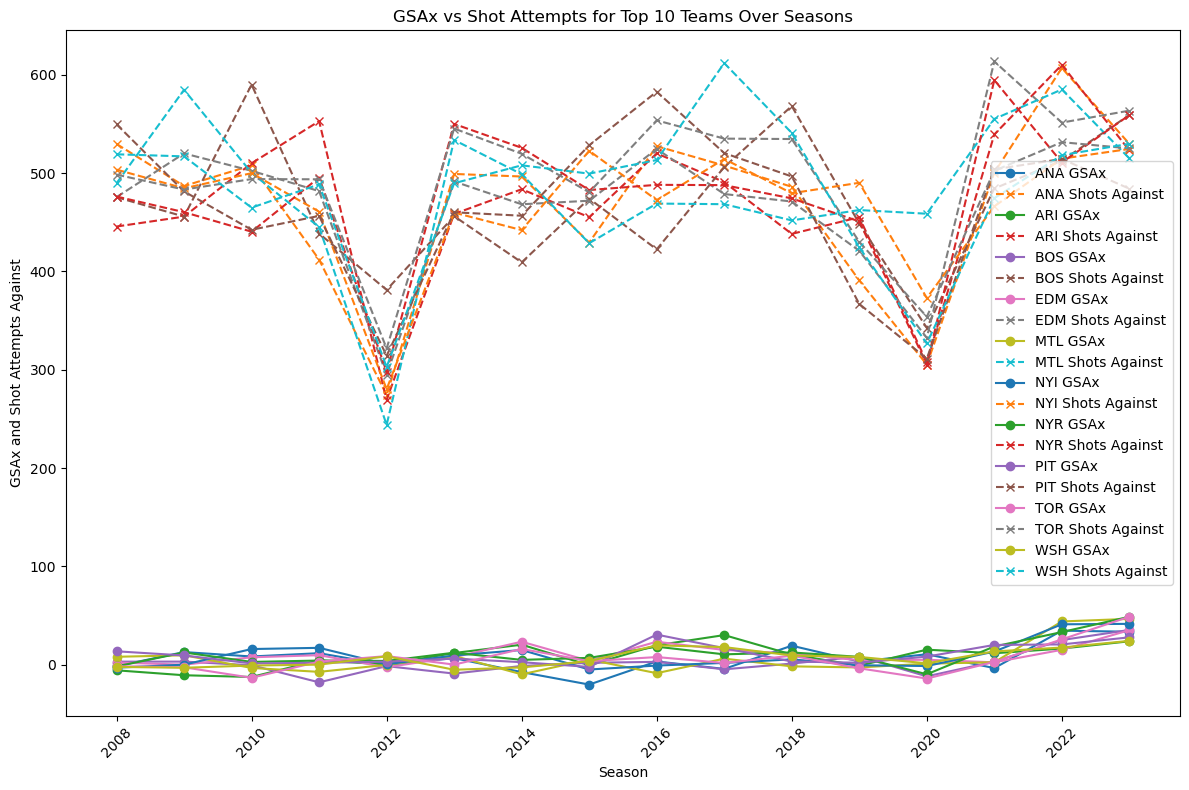

In [63]:
plt.figure(figsize=(12, 8))
for team in top_10_teams_data['team'].unique():
    team_season_data = top_10_teams_data[top_10_teams_data['team'] == team]
    plt.plot(team_season_data['season'], team_season_data['total_GSAx'], marker='o', label=f'{team} GSAx')
    plt.plot(team_season_data['season'], team_season_data['total_shot_attempts_against'], marker='x', linestyle='--', label=f'{team} Shots Against')
plt.xlabel('Season')
plt.ylabel('GSAx and Shot Attempts Against')
plt.title('GSAx vs Shot Attempts for Top 10 Teams Over Seasons')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

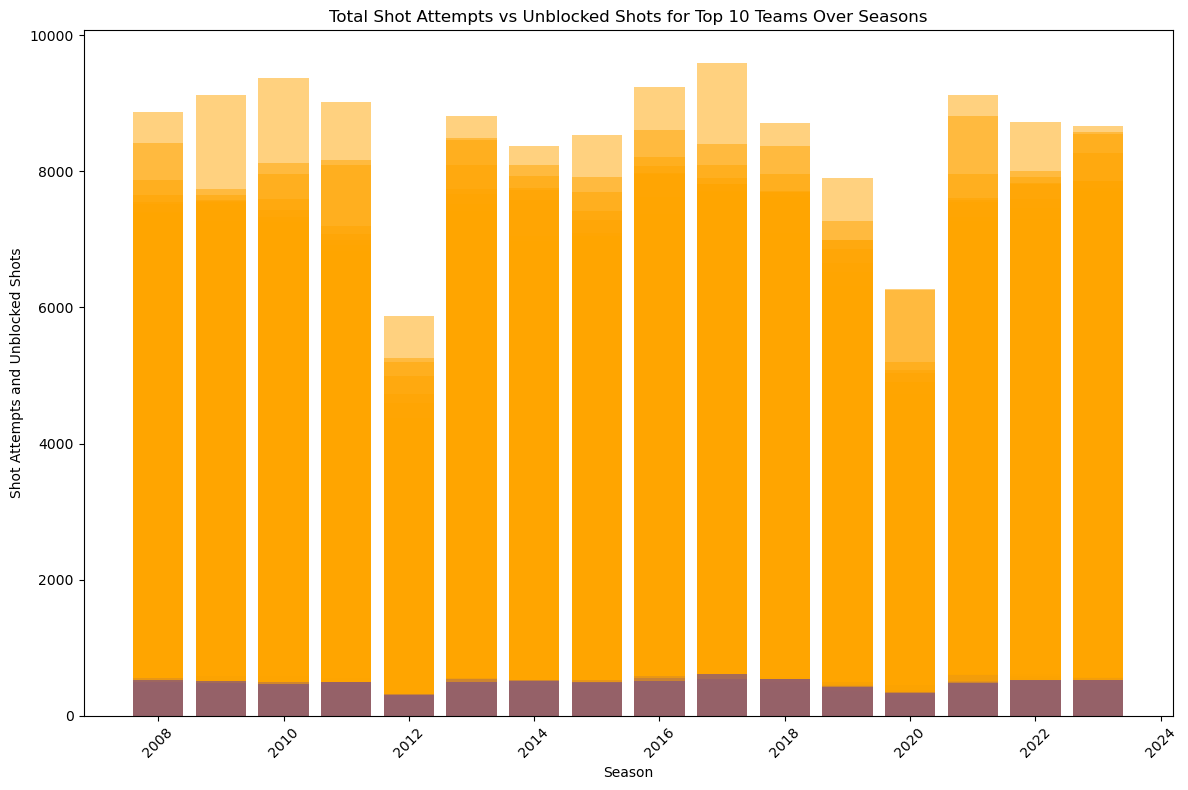

In [64]:
plt.figure(figsize=(12, 8))
for team in top_10_teams_data['team'].unique():
    team_season_data = top_10_teams_data[top_10_teams_data['team'] == team]
    plt.bar(team_season_data['season'], team_season_data['total_shot_attempts_against'], color='blue', alpha=0.7, label=f'{team} Shot Attempts')
    plt.bar(team_season_data['season'], team_season_data['total_unblocked_shots_against'], color='orange', alpha=0.5, label=f'{team} Unblocked Shots')
plt.xlabel('Season')
plt.ylabel('Shot Attempts and Unblocked Shots')
plt.title('Total Shot Attempts vs Unblocked Shots for Top 10 Teams Over Seasons')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [66]:
teams['GSAx'] = teams['reboundxGoalsAgainst'] - teams['xGoalsFromxReboundsOfShotsAgainst']
teams

,team,season,name,gameId,playerTeam,opposingTeam,home_or_away,gameDate,position,situation,...,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst,playoffGame,GSAx
0,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,other,...,1.000,0.0,0.017,0.000,0.000,0.037,0.037,0.037,0,-0.017
1,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,all,...,30.369,5.0,0.396,0.168,0.168,2.917,2.833,2.714,0,-0.228
2,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,5on5,...,19.369,3.0,0.237,0.168,0.168,1.862,1.777,1.665,0,-0.069
3,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,4on5,...,9.000,1.0,0.124,0.000,0.000,0.795,0.795,0.789,0,-0.124
4,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,5on4,...,1.000,1.0,0.019,0.000,0.000,0.224,0.224,0.224,0,-0.019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204295,L.A,2017,L.A,2017030174,L.A,VGK,HOME,20180417,Team Level,other,...,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,1,0.000
204296,L.A,2017,L.A,2017030174,L.A,VGK,HOME,20180417,Team Level,all,...,36.654,8.0,0.320,0.285,0.285,1.853,2.012,1.976,1,-0.035
204297,L.A,2017,L.A,2017030174,L.A,VGK,HOME,20180417,Team Level,5on5,...,34.654,7.0,0.299,0.285,0.285,1.814,1.972,1.937,1,-0.014
204298,L.A,2017,L.A,2017030174,L.A,VGK,HOME,20180417,Team Level,4on5,...,2.000,0.0,0.021,0.000,0.000,0.040,0.040,0.040,1,-0.021


In [67]:
goalie_data_2010 = teams[teams['season'] == 2010]
goalie_data_2020 = teams[teams['season'] == 2020]

In [68]:
aggregated_2010 = goalie_data_2010.groupby('team').agg(
    total_shot_attempts_against=('totalShotCreditAgainst', 'sum'),
    total_unblocked_shots_against=('unblockedShotAttemptsAgainst', 'sum'),
    total_GSAx=('GSAx', 'sum'),
    total_x_goals_from_rebounds_against=('xGoalsFromxReboundsOfShotsAgainst', 'sum'),
    total_rebound_goals_against=('reboundxGoalsAgainst', 'sum')
).reset_index()
aggregated_2010

,team,total_shot_attempts_against,total_unblocked_shots_against,total_GSAx,total_x_goals_from_rebounds_against,total_rebound_goals_against
0,ANA,507.884,8118.0,8.258,90.404,98.662
1,ARI,510.050,7962.0,-12.588,89.119,76.531
2,ATL,481.685,7114.0,9.534,77.438,86.972
3,BOS,590.068,9372.0,-0.655,97.439,96.784
4,BUF,520.037,7772.0,-8.762,84.582,75.820
5,CAR,495.547,7760.0,1.680,85.614,87.294
6,CBJ,417.082,6620.0,-3.138,71.828,68.690
7,CGY,399.209,6514.0,-2.268,68.388,66.120
8,CHI,462.760,6972.0,0.412,76.354,76.766
9,COL,469.596,7280.0,16.312,80.487,96.799


In [69]:
aggregated_2020 = goalie_data_2020.groupby('team').agg(
    total_shot_attempts_against=('totalShotCreditAgainst', 'sum'),
    total_unblocked_shots_against=('unblockedShotAttemptsAgainst', 'sum'),
    total_GSAx=('GSAx', 'sum'),
    total_x_goals_from_rebounds_against=('xGoalsFromxReboundsOfShotsAgainst', 'sum'),
    total_rebound_goals_against=('reboundxGoalsAgainst', 'sum')
).reset_index()
aggregated_2020

,team,total_shot_attempts_against,total_unblocked_shots_against,total_GSAx,total_x_goals_from_rebounds_against,total_rebound_goals_against
0,ANA,305.232,4726.0,10.514,51.426,61.940
1,ARI,307.628,4734.0,15.197,51.960,67.157
2,BOS,342.582,5194.0,-11.956,56.222,44.266
3,BUF,319.536,5118.0,6.641,53.919,60.560
4,CAR,346.483,5342.0,1.315,56.949,58.264
5,CBJ,325.635,4896.0,5.052,51.668,56.720
6,CGY,302.479,4352.0,-7.864,47.238,39.374
7,CHI,311.069,4920.0,11.672,52.340,64.012
8,COL,290.810,4750.0,-1.151,52.292,51.141
9,DAL,271.492,4318.0,-2.699,44.991,42.292


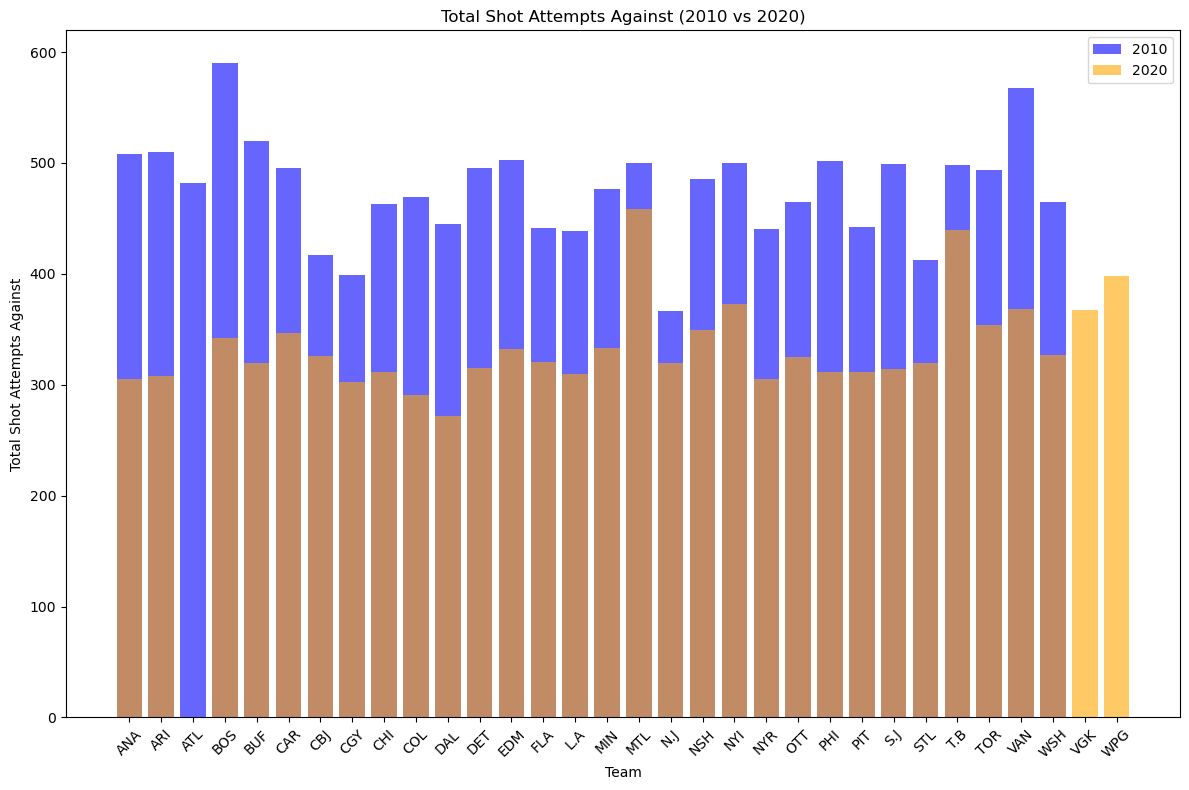

In [71]:
plt.figure(figsize=(12, 8))
plt.bar(aggregated_2010['team'], aggregated_2010['total_shot_attempts_against'], color='blue', alpha=0.6, label='2010')
plt.bar(aggregated_2020['team'], aggregated_2020['total_shot_attempts_against'], color='orange', alpha=0.6, label='2020')
plt.xlabel('Team')
plt.ylabel('Total Shot Attempts Against')
plt.title('Total Shot Attempts Against (2010 vs 2020)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

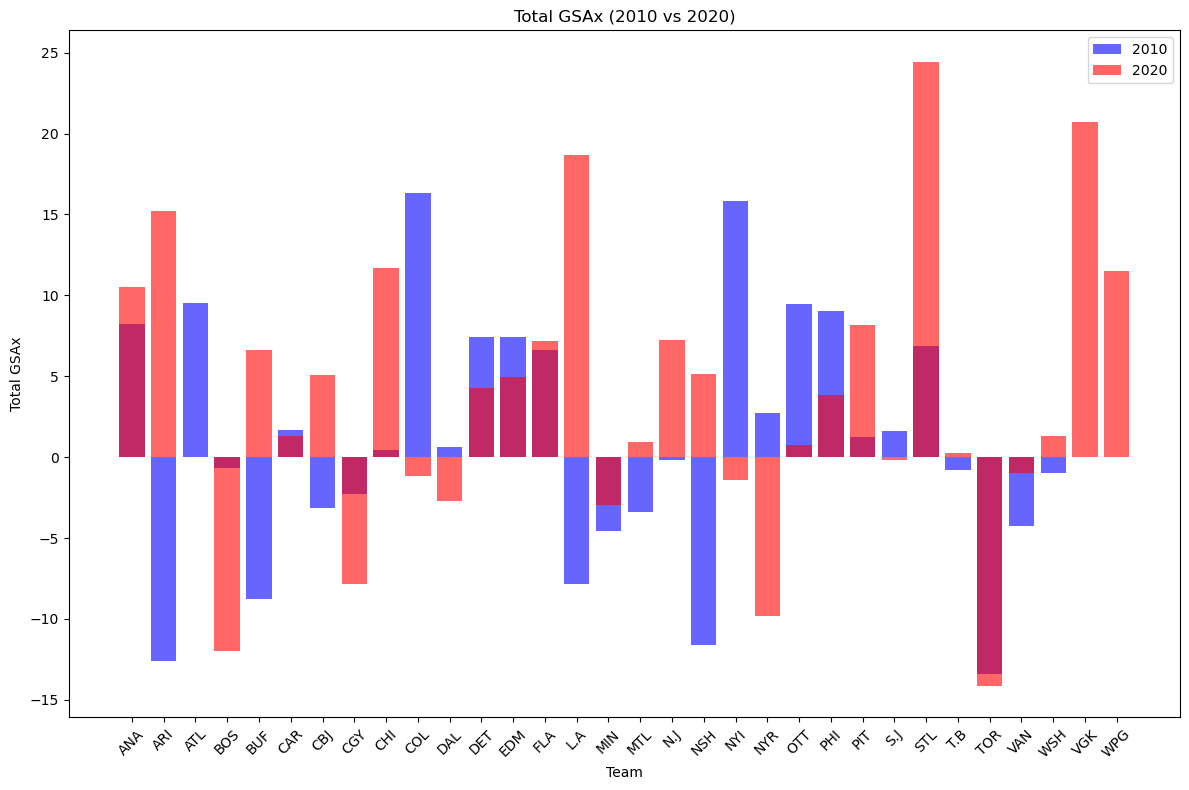

In [72]:
plt.figure(figsize=(12, 8))
plt.bar(aggregated_2010['team'], aggregated_2010['total_GSAx'], color='blue', alpha=0.6, label='2010')
plt.bar(aggregated_2020['team'], aggregated_2020['total_GSAx'], color='red', alpha=0.6, label='2020')
plt.xlabel('Team')
plt.ylabel('Total GSAx')
plt.title('Total GSAx (2010 vs 2020)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

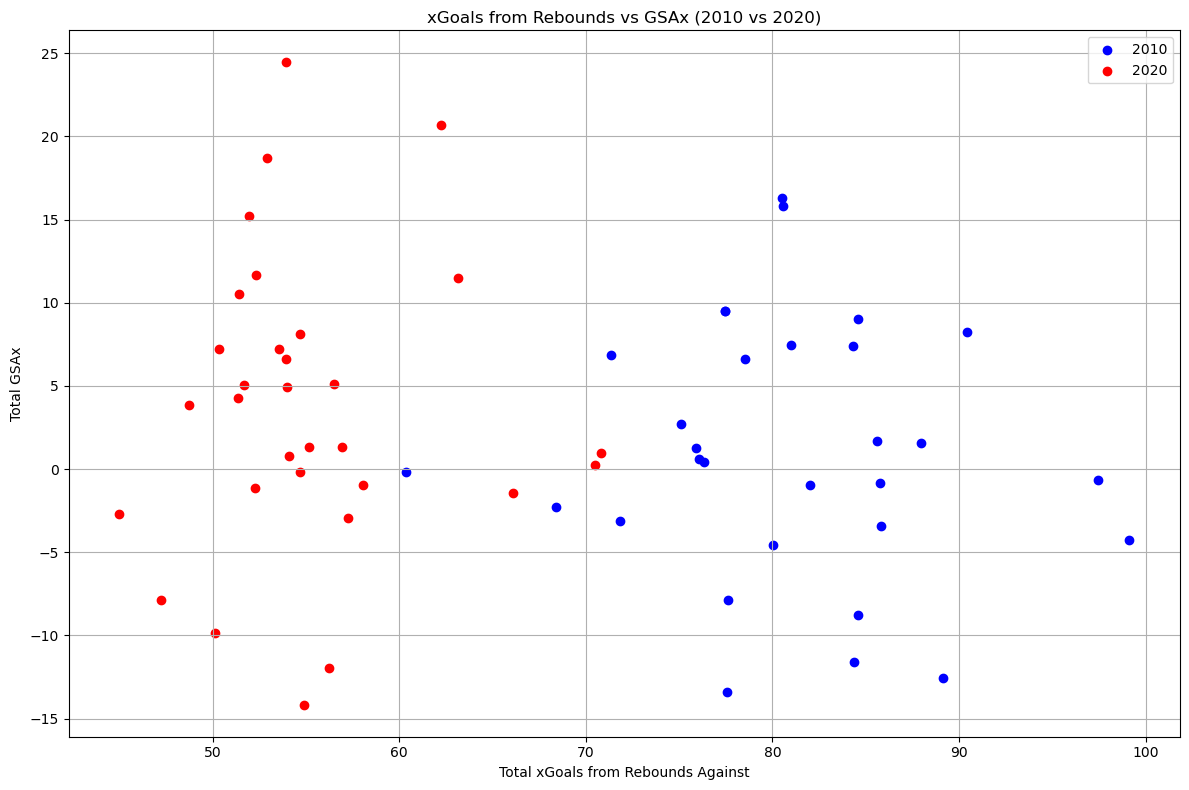

In [73]:
plt.figure(figsize=(12, 8))
plt.scatter(aggregated_2010['total_x_goals_from_rebounds_against'], aggregated_2010['total_GSAx'], color='blue', label='2010')
plt.scatter(aggregated_2020['total_x_goals_from_rebounds_against'], aggregated_2020['total_GSAx'], color='red', label='2020')
plt.xlabel('Total xGoals from Rebounds Against')
plt.ylabel('Total GSAx')
plt.title('xGoals from Rebounds vs GSAx (2010 vs 2020)')
plt.legend()
plt.grid(True)
plt.tight_layout()

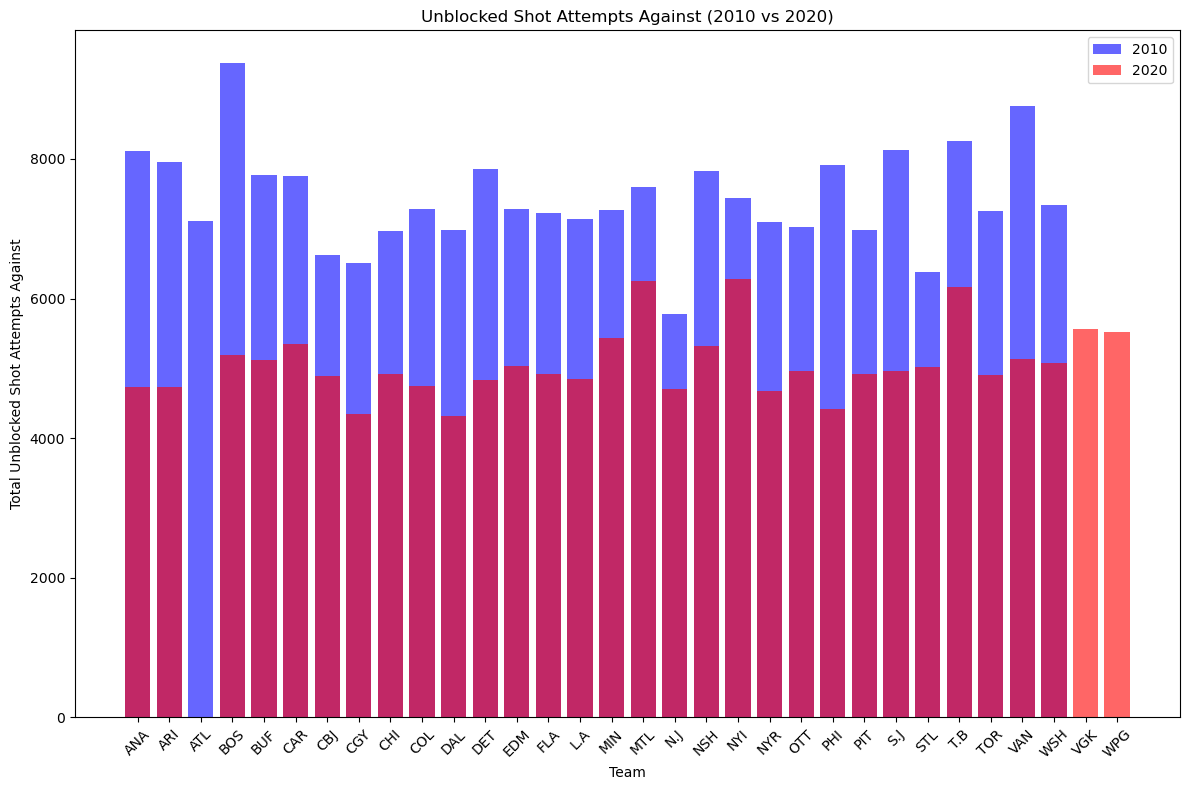

In [74]:
plt.figure(figsize=(12, 8))
plt.bar(aggregated_2010['team'], aggregated_2010['total_unblocked_shots_against'], color='blue', alpha=0.6, label='2010')
plt.bar(aggregated_2020['team'], aggregated_2020['total_unblocked_shots_against'], color='red', alpha=0.6, label='2020')
plt.xlabel('Team')
plt.ylabel('Total Unblocked Shot Attempts Against')
plt.title('Unblocked Shot Attempts Against (2010 vs 2020)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

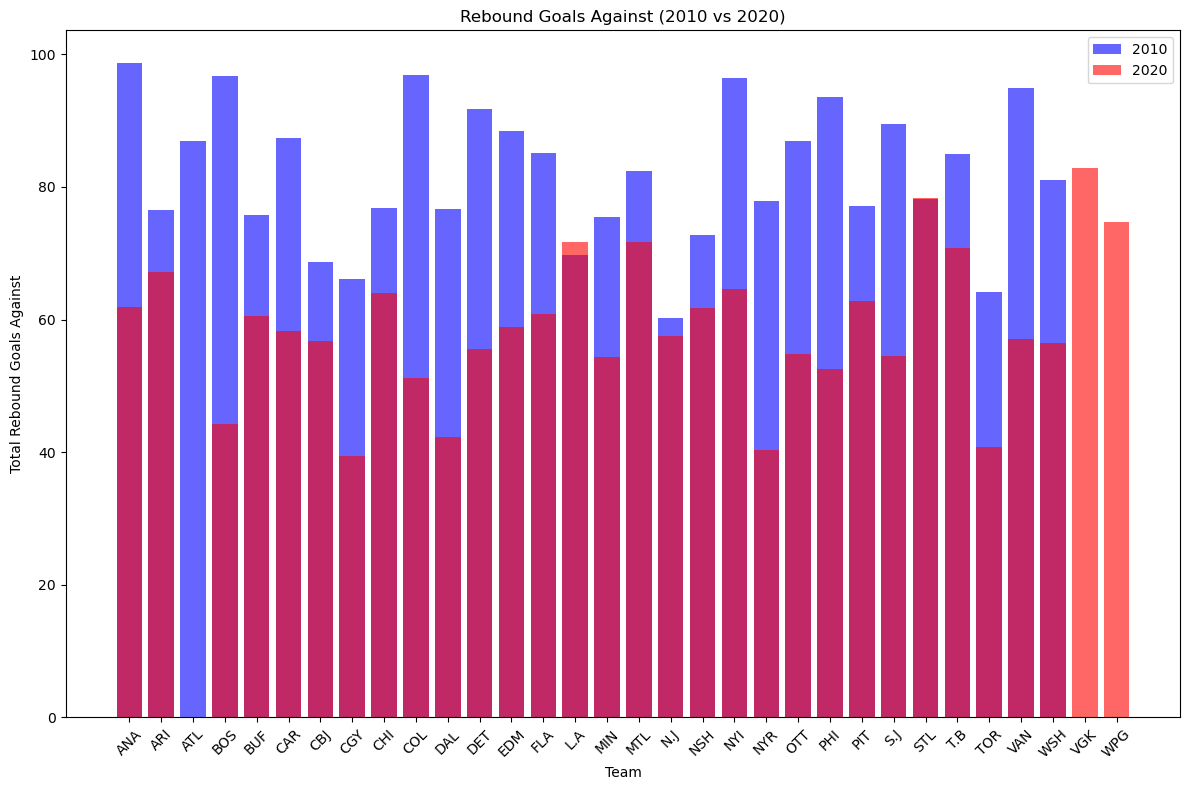

In [75]:
plt.figure(figsize=(12, 8))
plt.bar(aggregated_2010['team'], aggregated_2010['total_rebound_goals_against'], color='blue', alpha=0.6, label='2010')
plt.bar(aggregated_2020['team'], aggregated_2020['total_rebound_goals_against'], color='red', alpha=0.6, label='2020')
plt.xlabel('Team')
plt.ylabel('Total Rebound Goals Against')
plt.title('Rebound Goals Against (2010 vs 2020)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

In [76]:
situation_data = teams.groupby(['team', 'situation']).agg(
    total_GSAx=('GSAx', 'sum'),
    total_shot_attempts_against=('totalShotCreditAgainst', 'sum')
).reset_index()
situation_data

,team,situation,total_GSAx,total_shot_attempts_against
0,ANA,4on5,4.409,767.890
1,ANA,5on4,-2.795,84.532
2,ANA,5on5,39.421,2441.231
3,ANA,all,52.685,3745.307
4,ANA,other,11.729,451.619
...,...,...,...,...
180,WSH,4on5,10.434,720.124
181,WSH,5on4,-0.546,98.143
182,WSH,5on5,32.847,2577.103
183,WSH,all,53.977,3864.853


In [77]:
top_10_situation_data = situation_data[situation_data['team'].isin(top_10_teams_by_shots['team'])]
top_10_situation_data

,team,situation,total_GSAx,total_shot_attempts_against
0,ANA,4on5,4.409,767.890
1,ANA,5on4,-2.795,84.532
2,ANA,5on5,39.421,2441.231
3,ANA,all,52.685,3745.307
4,ANA,other,11.729,451.619
5,ARI,4on5,11.536,734.594
6,ARI,5on4,-1.994,93.389
7,ARI,5on5,44.736,2477.587
8,ARI,all,66.152,3757.905
9,ARI,other,11.878,452.352


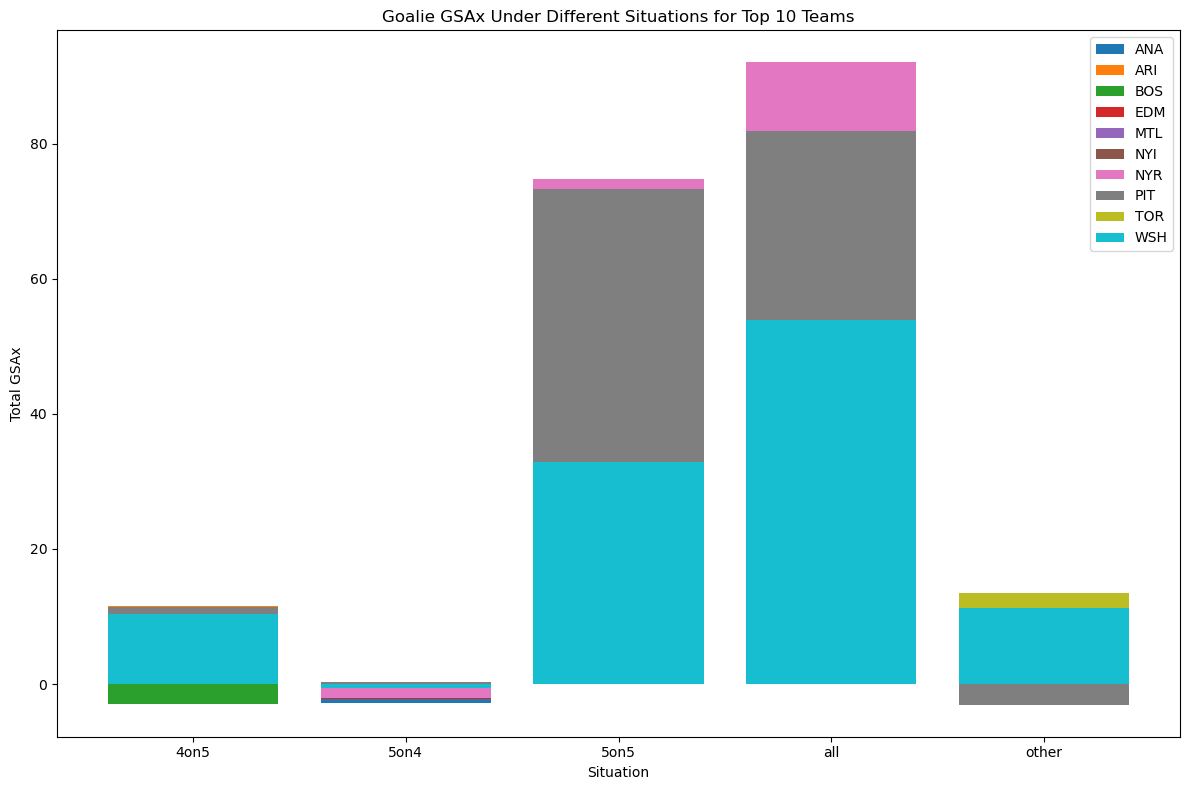

In [78]:
plt.figure(figsize=(12, 8))
for team in top_10_situation_data['team'].unique():
    team_situation_data = top_10_situation_data[top_10_situation_data['team'] == team]
    plt.bar(team_situation_data['situation'], team_situation_data['total_GSAx'], label=team)
plt.xlabel('Situation')
plt.ylabel('Total GSAx')
plt.title('Goalie GSAx Under Different Situations for Top 10 Teams')
plt.legend()
plt.tight_layout()
plt.show()

In [79]:
gsax_per_game_data = teams.groupby(['team', 'gameId']).agg(
    total_GSAx=('GSAx', 'sum')
).reset_index()
gsax_per_game_data

,team,gameId,total_GSAx
0,ANA,2008020008,0.014
1,ANA,2008020030,1.079
2,ANA,2008020042,-0.685
3,ANA,2008020048,-0.555
4,ANA,2008020061,-0.284
...,...,...,...
40855,WSH,2023021299,1.422
40856,WSH,2023030131,0.096
40857,WSH,2023030132,-0.845
40858,WSH,2023030133,0.586


In [80]:
top_10_gsax_per_game = gsax_per_game_data[gsax_per_game_data['team'].isin(top_10_teams_by_shots['team'])]
top_10_gsax_per_game

,team,gameId,total_GSAx
0,ANA,2008020008,0.014
1,ANA,2008020030,1.079
2,ANA,2008020042,-0.685
3,ANA,2008020048,-0.555
4,ANA,2008020061,-0.284
...,...,...,...
40855,WSH,2023021299,1.422
40856,WSH,2023030131,0.096
40857,WSH,2023030132,-0.845
40858,WSH,2023030133,0.586


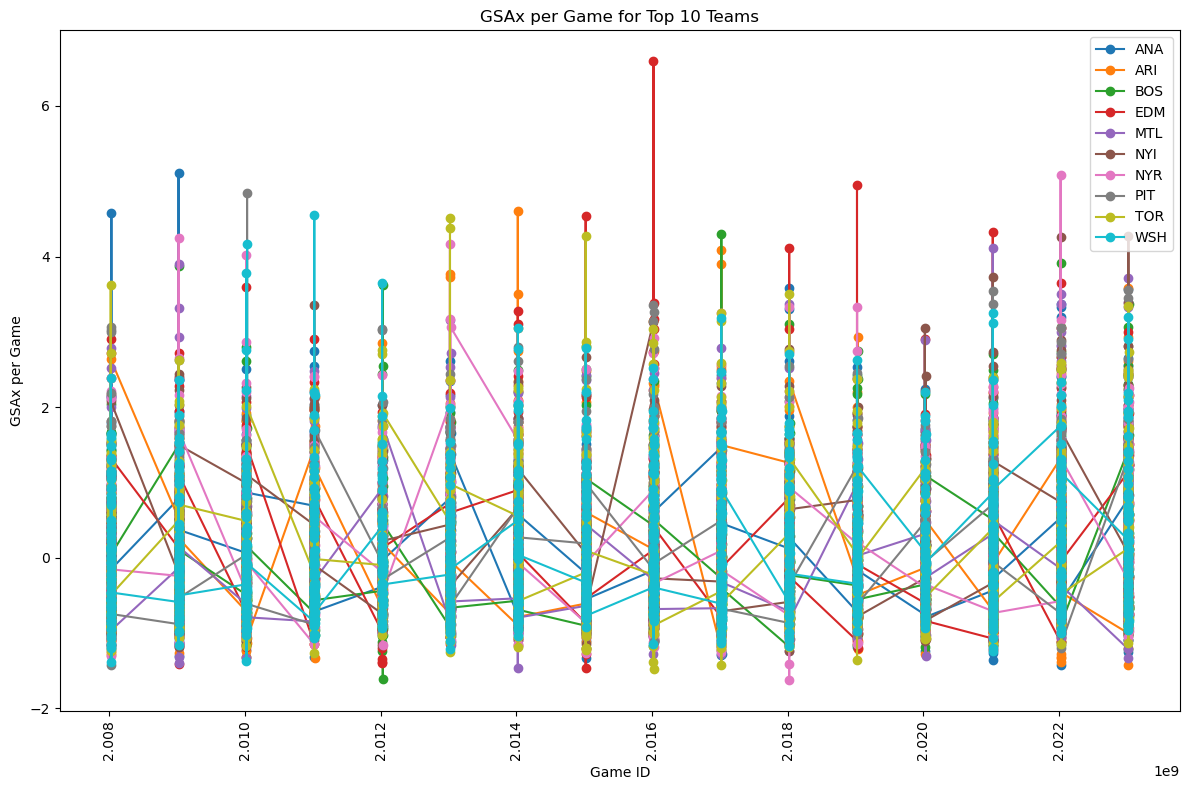

In [81]:
plt.figure(figsize=(12, 8))
for team in top_10_gsax_per_game['team'].unique():
    team_game_data = top_10_gsax_per_game[top_10_gsax_per_game['team'] == team]
    plt.plot(team_game_data['gameId'], team_game_data['total_GSAx'], marker='o', label=team)
plt.xlabel('Game ID')
plt.ylabel('GSAx per Game')
plt.title('GSAx per Game for Top 10 Teams')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()